In [3]:
import natsort as natsort
import pandas as pd
import os
import natsort
from datetime import date, datetime
import matplotlib.pyplot as plt
from matplotlib import rc
from urllib.parse import quote

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']= False
from IPython.core.display_functions import display

# Schedule.ipynb를 작성하고 나서
### 의외로 득실차는 LG가 더 좋았다.

In [180]:
team_list = ["LG", "SSG", "키움"]
color_list=["#DB1916", "#fff000", "#760c0c"]
check_list = ["순위", "승리","득실차", "게임차"]

init_data = [0,0,0,0,0,0]
KBO_team = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배", "득점", "실점"], index=team_list)
for team in team_list:
    KBO_team.loc[team] = init_data

KBO_team

,경기수,승리,무승부,패배,득점,실점
LG,0,0,0,0,0,0
SSG,0,0,0,0,0,0
키움,0,0,0,0,0,0


In [181]:
rank_list = os.listdir("./date_rank")
sorted_rank = natsort.natsorted(rank_list)

In [182]:
df_list = []
for team, color in zip(team_list, color_list):
    df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","승점", "게임차", "순위", "일자", "득실차"])

    for file in sorted_rank:
        if file == ".DS_Store":
            continue
        date = datetime.strptime("2022."+file.replace('.csv', ''), '%Y.%m.%d')
        rank_df = pd.read_csv('./date_rank/'+file, index_col=0)
        rank_df["일자"] = date
        rank_df["승리"] = abs(rank_df["승리"]-rank_df.loc["SSG", "승리"])
        rank_df["득실차"] = rank_df["득점"] - rank_df["실점"]

        rank_list = list(rank_df.loc[team, :])
        df_result.loc[len(df_result)] = rank_list
    df_list.append(df_result)

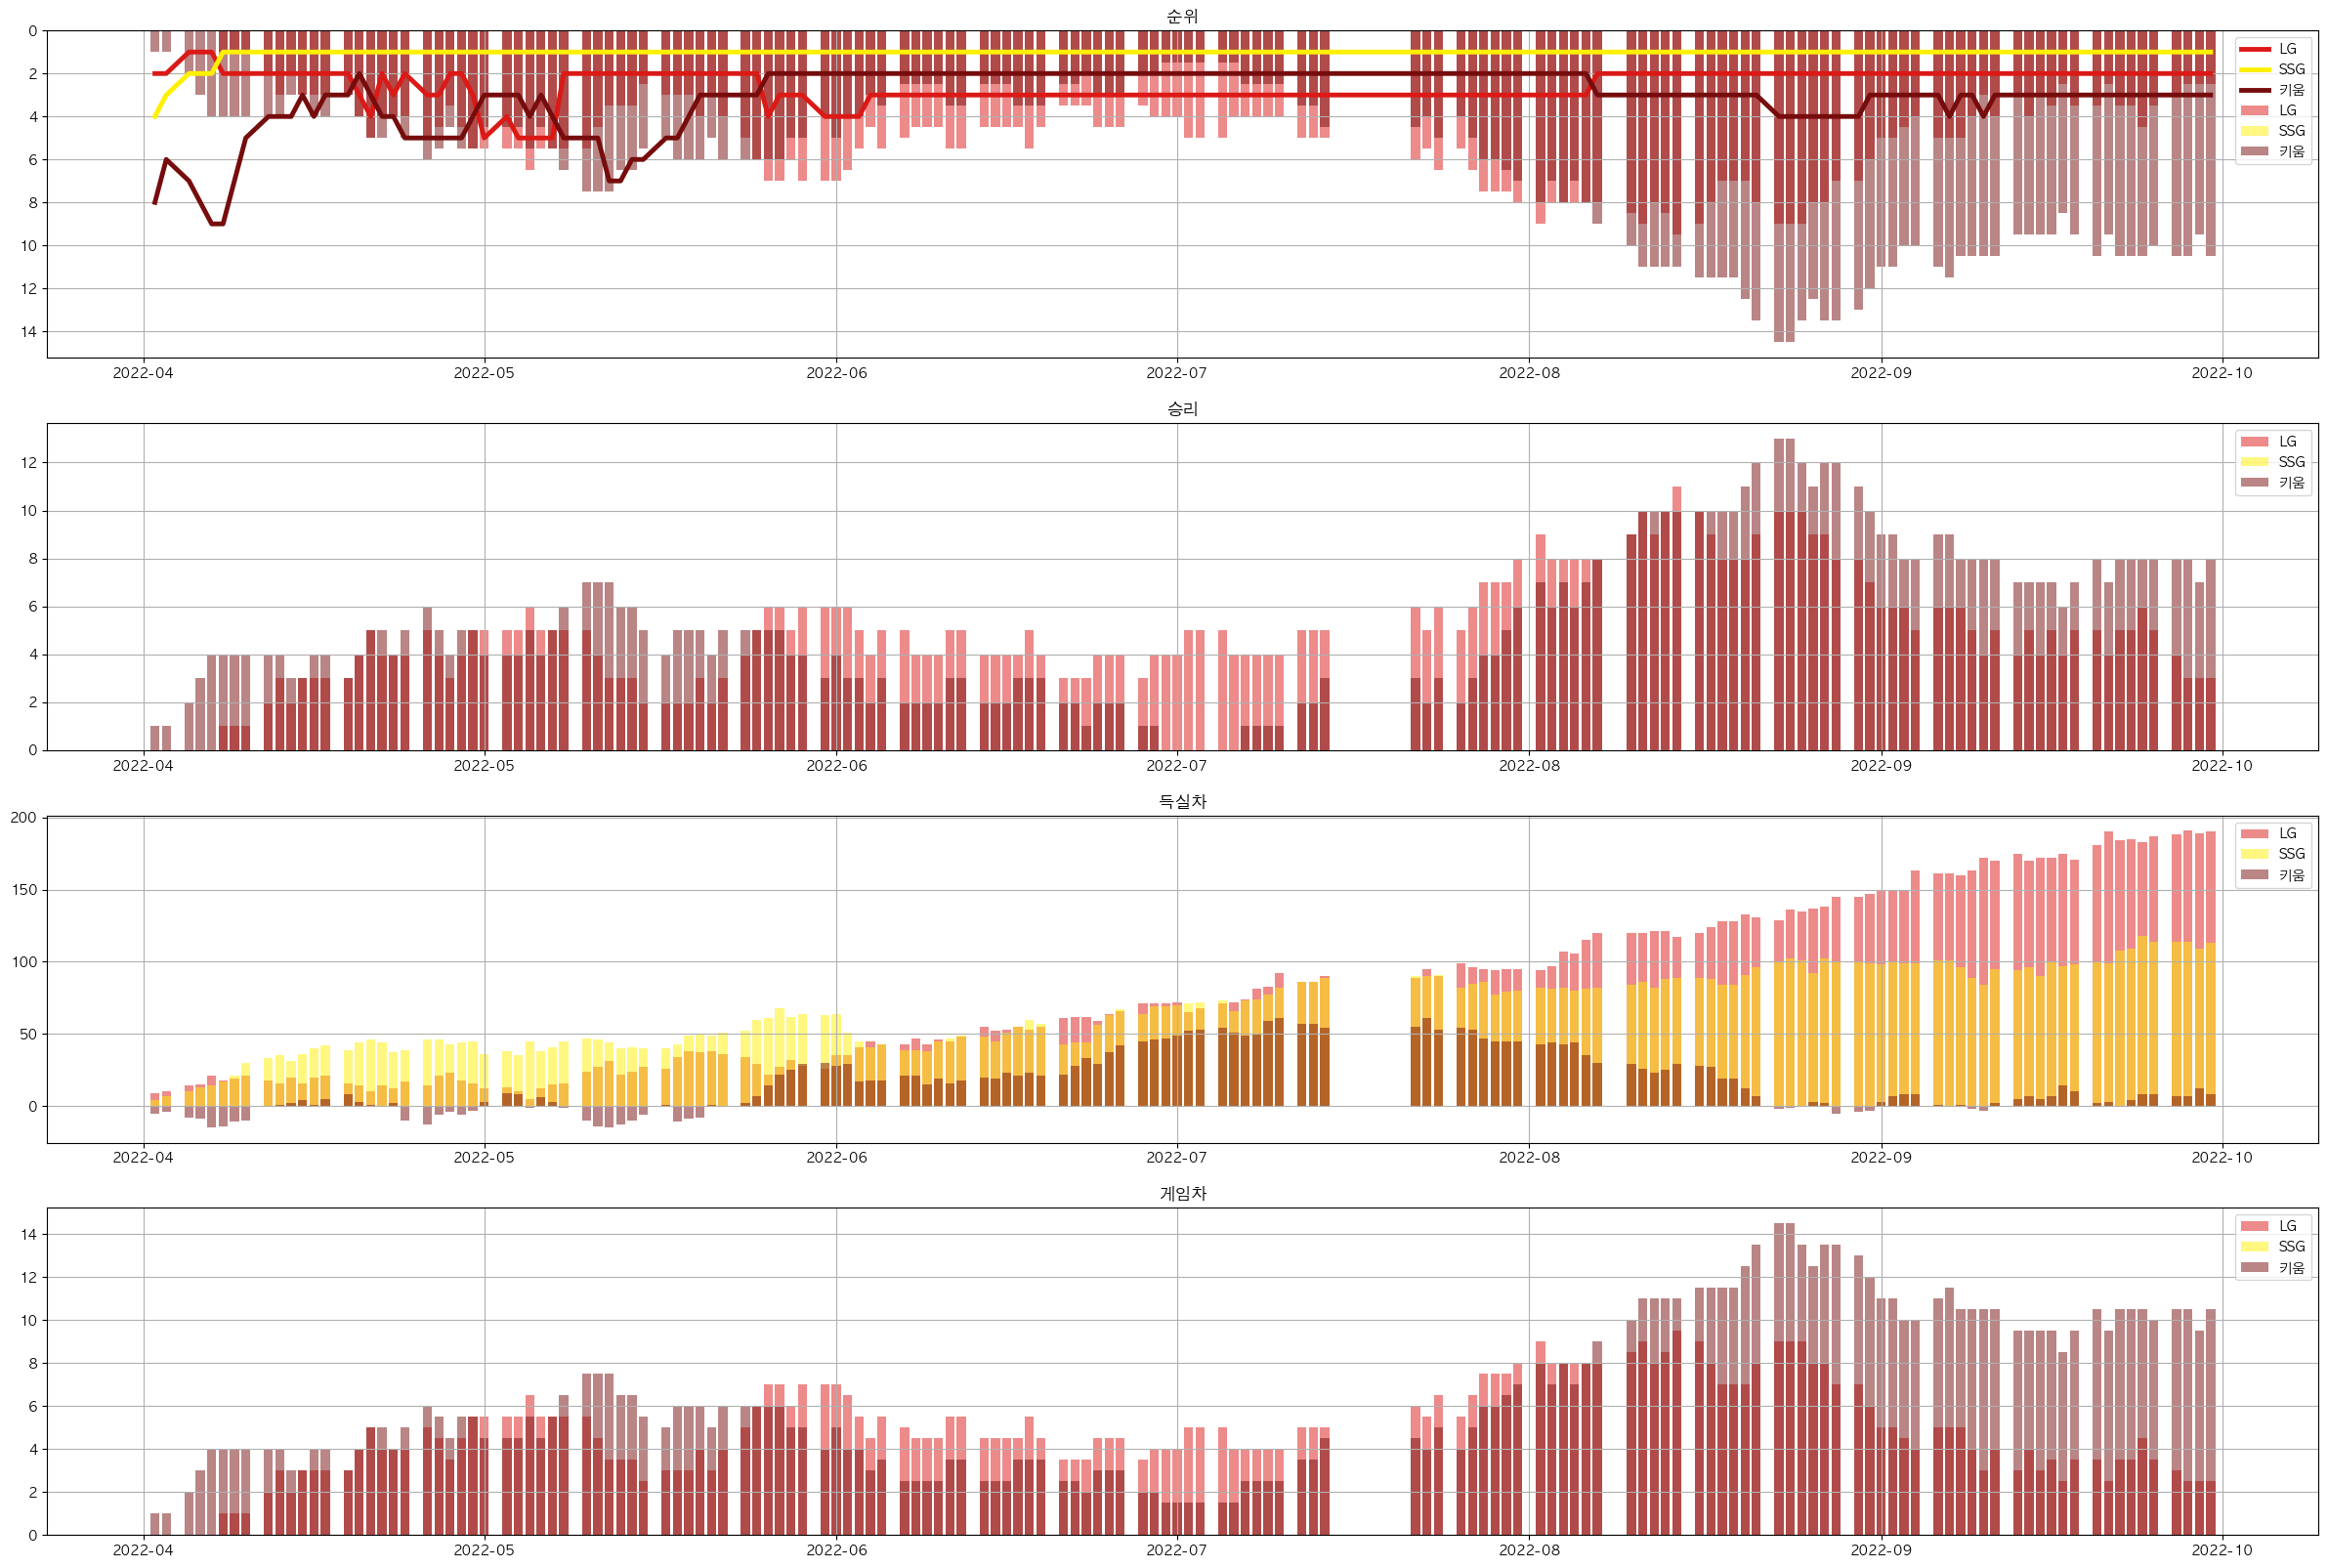

In [183]:
nrow = 3
ncol = 1
plt.figure(figsize=(30,20))

for r, check in enumerate(check_list, start=1):
    plt.subplot(4, 1, r)
    plt.title(check)
    for team, color, name in zip(df_list, color_list, team_list):
        if r != 1:
            plt.bar(team["일자"], team[check], label=name, color=color, alpha=0.5)
        elif r==1:
            plt.plot(team["일자"], team[check], label=name, color=color, linewidth=3.5)
            plt.bar(team["일자"], team["게임차"], label=name, alpha=0.5, color=color)
            plt.gca().invert_yaxis()
    plt.grid()
    plt.legend(loc='best')

plt.show()

- 전반기에는 SSG가 더 적게 실점하고 더 많이 득점을 얻어내는 경향을 보였음
- 하지만 6월 두 팀 간의 격차가 줄어들기 시작함
- 결국 올스타전 이후로 LG가 득실차에서 더 우위를 선점하기 시작함.
- LG가 하지만 결국 승리 차이를 극복하는데는 실패함

- 여기까지가 `네이버 경기일정`에서 얻어낸 정보

# 어떤 이유로 SSG가 wire to wire 우승을 거둘 수 있었는가?
- 득실차에서 2위한테도 밀리는데?
## 타자 조사

In [35]:
query = quote("SSG") #protecting for unicode error
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2022&ye=2022&se=0&te={}&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=50&si=&cn=".format(query)
# pa => 시작 인덱스
# sn => 화면에 나타낼 데이터 수
# 즉, pa=0&sn=30 -> 0번부터 30개 정보 출력 / pa=0&sn=50 -> 0번부터 50개 정보 있는대로 출력
df = pd.read_html(url, index_col=1)
df[0]

이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율  \
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
최정      1  22S3B   5.36  119  497  406  80  110  21   0  ...   0   6  .271   
최지훈     2  22SCF   4.71  140  631  561  92  170  32   4  ...  12   4  .303   
박성한     3  22SSS   4.06  136  548  478  68  141  23   4  ...   6   2  .295   
한유섬     4  22SRF   3.94  133  540  453  61  120  33   1  ...   0   5  .265   
추신수     5  22SDH   2.38  112  499  409  77  106  20   1  ...   2   4  .259   
김강민     6  22SCF   1.29   82  194  171  22   52  11   0  ...   2   1  .304   
라가레스    7  22SLF   1.19   49  202  180  24   57   9   0  ...   4   3  .317   
전의산     8  22S1B   1.01   73  257  233  35   59  15   1  ...   0   1  .253   
최주환     9  22S2B   0.66   93  319  285  35   62  14   2  ...   0   2  .218   
이재원    10   22SC   0.36  103  275  230  27   47   6   0  ...   9   3  .204   
이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율   
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
김민식    11   22SC   0.28   80  198  162  23   36   7   1  ...   6   2  .222   
최경모    12  22S3B   0.17   95   73   71  16   22   2   0  ...   1   0  .310   
하재훈    13  22SLF   0.15   57  106   99  18   21   5   1  ...   0   2  .212   
오태곤    14  22SLF   0.12  127  284  253  47   59  15   1  ...   5   3  .233   
최준우    15  22S2B   0.11    6   10    6   0    2   0   0  ...   0   1  .333   
조형우    16   22SC   0.09    6    8    7   2    2   1   0  ...   0   0  .286   
이정범    17  22SLF   0.00    4    4    4   2    1   0   0  ...   0   0  .250   
김택형    18   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
박민호   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
서동민   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율   
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
조요한   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
고효준   NaN   22SP   0.00    2    0    0   0    0   0   0  ...   0   0   NaN   
최민준   NaN   22SP   0.00    1    0    0   0    0   0   0  ...   0   0   NaN   
최상민    24  22SLF  -0.04   25   14   11   3    1   0   0  ...   0   0  .091   
안상현    25  22S2B  -0.05   43   40   32  11    5   0   0  ...   3   0  .156   
석정우    26  22S2B  -0.05    7    6    6   1    1   0   0  ...   0   0  .167   
김규남    27  22SRF  -0.08    1    3    3   0    0   0   0  ...   0   0  .000   
김재현    28  22S3B  -0.10   18   20   18   2    4   1   0  ...   2   0  .222   
오준혁    29  22SRF  -0.12   47   67   61   3   14   2   0  ...   1   0  .230   
이현석    30   22SC  -0.16    9   15   15   0    2   0   0  ...   0   0  .133   
이름      순      팀     정렬    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    비율   
이름      순      팀   WAR*    G   타석   타수  득점   안타  2타  3타  ...  희타  희비    타율   
이흥련    31   22SC  -0.19   22   55   45   4    6   2   0  ...   3   0  .133   
크론     32  22S1B  -0.19   67  259  243  21   54  13   1  ...   0   4  .222   
최항     33  22SDH  -0.31   15   24   20   0    2   0   0  ...   0   1  .100   
김성현    34  22S2B  -0.60  128  355  300  38   66   9   1  ...  20   3  .220   

이름                                     WAR*    WPA  
이름      출루    장타   OPS  wOBA    wRC+   WAR*    WPA  
최정    .392  .515  .907  .406   149.8   5.36   3.91  
최지훈   .362  .428  .790  .358   121.3   4.71   1.78  
박성한   .375  .372  .747  .348   116.1   4.06   1.23  
한유섬   .374  .481  .855  .384   136.2   3.94   3.49  
추신수   .382  .430  .813  .374   129.9   2.38   2.01  
김강민   .375  .439  .814  .369   127.3   1.29   1.07  
라가레스  .364  .467  .830  .368   126.9   1.19   1.19  
전의산   .319  .481  .800  .354   115.3   1.01   0.28  
최주환   .295  .365  .660  .303    82.5   0.66  -0.37  
이재원   .301  .283  .583  .271    60.5   0.36  -1.37  
이름      비율    비율    비율    비율      비율   WAR*    WPA  
이름      출루    장타   OPS  wOBA    wR

In [36]:
df[0] = df[0].drop(["팀"], axis=1)

/var/folders/lz/2mfdswrd571f8d69ht6n663w0000gn/T/ipykernel_47362/3901085681.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df[0] = df[0].drop(["팀"], axis=1)


In [37]:
test = df[0]["비율"]
test = test.drop(["wRC+", "OPS"], axis=1)

In [38]:
test = test.dropna() #투수들 기록은 nan값으로 나옴. 그런데, nan으로 안나왔다면, 진짜로 타석에 선거라 그건 의미있는 자료가 맞다고 판단해서 넣을 예정임
test = test.drop(["이름"]) #테이블이 크다보니 범례 row가 한 번 더 나타나서 그거 제거함

In [39]:
test = test.astype('float64') #object 형으로 출력되므로, float로 변환하여 plot을 그려볼 예정
test.dtypes

이름
타율      float64
출루      float64
장타      float64
wOBA    float64
dtype: object

In [53]:
test["출-타"] = test["출루"] - test["타율"]
test["장-타"] = test["장타"] - test["타율"]
test["장-출"] = test["장타"] - test["출루"]
test

이름,타율,출루,장타,wOBA,출-타,장-타,장-출
최정,0.271,0.392,0.515,0.406,0.121,0.244,0.123
최지훈,0.303,0.362,0.428,0.358,0.059,0.125,0.066
박성한,0.295,0.375,0.372,0.348,0.080,0.077,-0.003
한유섬,0.265,0.374,0.481,0.384,0.109,0.216,0.107
추신수,0.259,0.382,0.430,0.374,0.123,0.171,0.048
김강민,0.304,0.375,0.439,0.369,0.071,0.135,0.064
라가레스,0.317,0.364,0.467,0.368,0.047,0.150,0.103
전의산,0.253,0.319,0.481,0.354,0.066,0.228,0.162
최주환,0.218,0.295,0.365,0.303,0.077,0.147,0.070
이재원,0.204,0.301,0.283,0.271,0.097,0.079,-0.018


<AxesSubplot: >

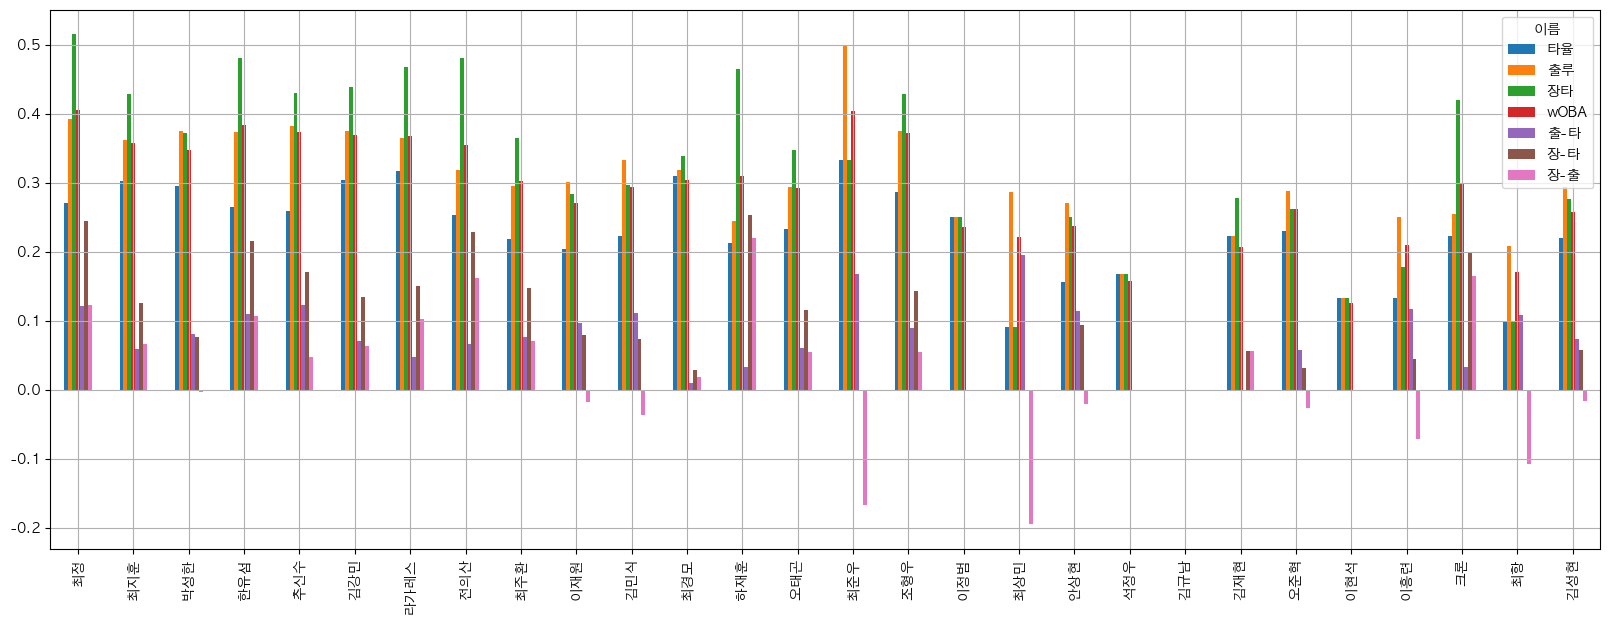

In [52]:
test.plot(kind="bar", figsize=(20, 7), grid=True)

<AxesSubplot: title={'center': '출루/타율 단순 비교'}>

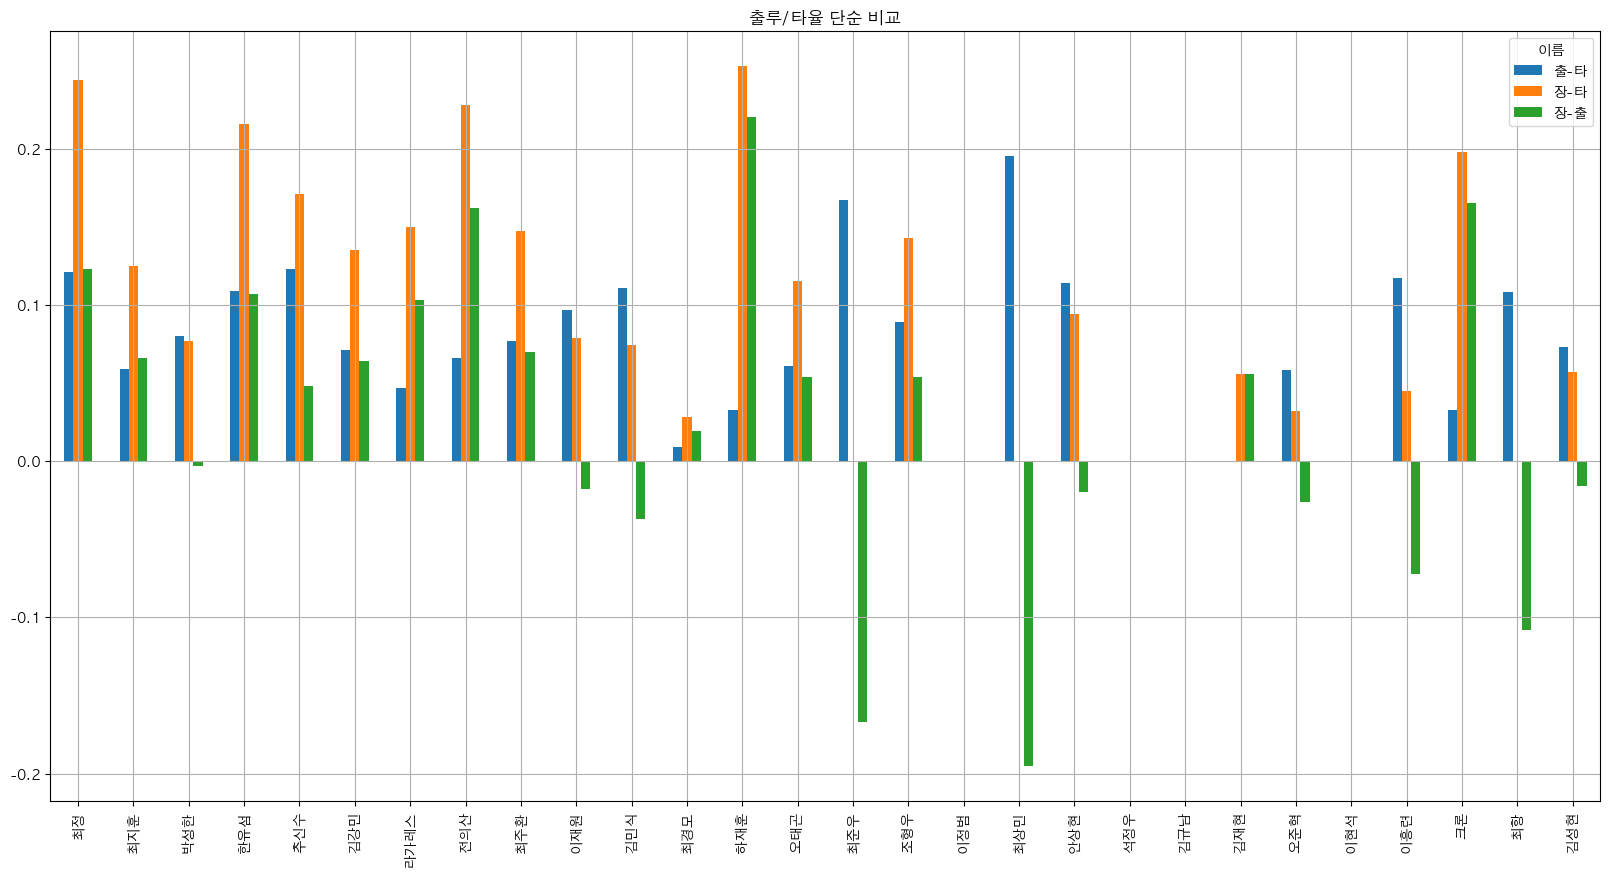

In [54]:
test[["출-타", "장-타", "장-출"]].plot(kind='bar', figsize=(20,10), title="출루/타율 단순 비교", grid=True)